# Обзор рынка игр

Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы. Необходимо выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании для интернет-магазина «Стримчик» (заказчик), который продаёт по всему миру компьютерные игры.

<b>Выборка:</b> данные рынка игр за 2016 год. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы.

<b>Описание данных:</b><br>
<i>Name</i> — название игры<br>
<i>Platform</i> — платформа<br>
<i>Year_of_Release</i> — год выпуска<br>
<i>Genre</i> — жанр игры<br>
<i>NA_sales</i> — продажи в Северной Америке (миллионы долларов)<br>
<i>EU_sales</i> — продажи в Европе (миллионы долларов)<br>
<i>JP_sales</i> — продажи в Японии (миллионы долларов)<br>
<i>Other_sales</i> — продажи в других странах (миллионы долларов)<br>
<i>Critic_Score</i> — оценка критиков (максимум 100)<br>
<i>User_Score</i> — оценка пользователей (максимум 10)<br>
<i>Rating</i> — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.<br><br>
<ins>Данные за 2016 год могут быть неполными.</ins><br>

<b>Цель:</b> выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Необходимо просмотреть данные, обработать пропуски. Произвести исследвовательский анализ данных, выяснить актуальный период исследования, тенденции рынка и составить портрет типичного пользователя.

## 1. Обзор и подготовка данных

In [178]:
#Библиотеки

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st
import seaborn as sns

In [179]:
#Загрузка данных

data_games = pd.read_csv('/datasets/games.csv')

In [180]:
data_games.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [181]:
data_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [182]:
#Приведение названия колонок к нижнему регистру

data_games.columns = data_games.columns.str.lower()

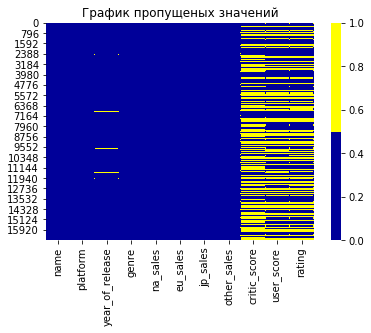

In [183]:
#график для просмотра пропущеных значений

cols = data_games.columns[:30] # первые 30 колонок
# определяем цвета 
# желтый - пропущенные данные, синий - не пропущенные
colours = ['#000099', '#ffff00'] 
ax=sns.heatmap(data_games[cols].isnull(), cmap=sns.color_palette(colours))
ax.set_title('График пропущеных значений')
plt.show()

In [184]:
#обработка пропущенных значений в столбце дата релиза для одинаковых игр (по назавнию)

def good_years(row):
    x = row['name']
    y =  row['year_of_release']
    if y > 0:
        
        return y
         
    else:
        dat = data_games[data_games['name']==x]['year_of_release'].mean()
        return dat

data_games['year'] = data_games.apply(good_years, axis=1)

In [185]:
#Замена пользовательского рейтинга tbd на пустые значения

data_games['user_score']=data_games['user_score'].replace('tbd',np.nan).astype(float)

In [186]:
#создание столбца с сумарными продажами

data_games['total_sales'] = data_games['na_sales'] + data_games['eu_sales'] + data_games['jp_sales'] + data_games['other_sales']

In [187]:
#удалени строк с пропущеными значениями год и название игры

good_data = data_games
good_data = good_data.dropna(subset=['year','name']).copy()
good_data['year'] = good_data['year'].astype(int)
good_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16567 entries, 0 to 16714
Data columns (total 13 columns):
name               16567 non-null object
platform           16567 non-null object
year_of_release    16444 non-null float64
genre              16567 non-null object
na_sales           16567 non-null float64
eu_sales           16567 non-null float64
jp_sales           16567 non-null float64
other_sales        16567 non-null float64
critic_score       8075 non-null float64
user_score         7540 non-null float64
rating             9868 non-null object
year               16567 non-null int64
total_sales        16567 non-null float64
dtypes: float64(8), int64(1), object(4)
memory usage: 1.8+ MB


Теоретически, пропуски в данных user_score можно получить из внутрених магазинов платформ/ различных сервисов лценки игр. Critic_score с открытых источников, вроде metacritic и сайта ESRB.

### Промежуточные выводы

Пропущены 2 значения имени, их можно удалить.

Пропуски в столбце 'дата выпуска' были обработаны для одинаковых игр на разных платформах. Около 200 значений обработать не удалось, т.к. у них отсутствует данная информация на любой платформе (исключать их не будем, можно использовать для просмотра других данных).

Присутствует значительное кол-во пропусков в столбца пользовательский рейтинг/рейтинг критиков (возможно, что было недостаточно оценок для формирования рейтинга-для этого есть специальное обозначение <b>tbd</b>, либо данные утеряны). Так же, отсутствует значительное кол-во записей в столбце рейтинг esrb (возможно, часть игр не была оценена организацией). Из графика пропущених занчений видно, что часть значений пропущена сразу в трех столбцах, что указывает на высокую вероятность ошибок при загрузке данных. 

Значение tbd следует исключить из рейтинга оценок, т.к. информации для формирования оценки недостаточно. Произведена замена на NaN, чтобы не потерять остальные данные.

## 2. Исследовательский анализ данных

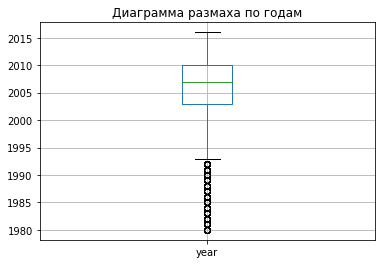

In [188]:
ax=good_data[['name','year']].boxplot('year')
ax.set_title('Диаграмма размаха по годам')
plt.show()

Из графика размаха стновиться видно выбросы - данные в которых год меньше 1993.

In [189]:
#получение среза данных с 1993 года и топ5 платформ

good_years_data = good_data.query('year>1993').copy()

big_5 = (good_years_data.groupby(['platform']).agg({'total_sales': 'sum'})
         .sort_values(by='total_sales', ascending=False).head()
        )
good_years_data['platform_name'] = (
    good_years_data['platform']
    .where(good_years_data['platform'].isin(big_5.index), 'Другие')
)

big_5_group = (good_years_data
               .pivot_table(index='year', columns='platform_name',
                            values='total_sales', aggfunc='sum')
              )

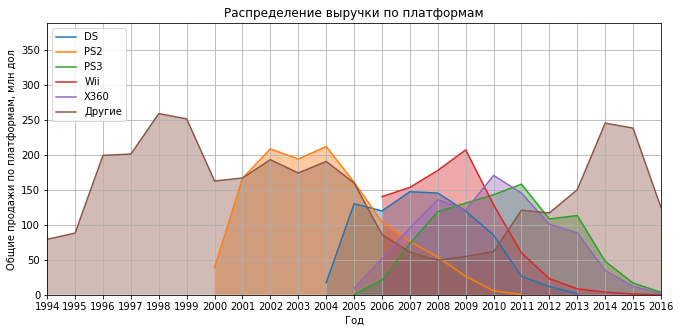

In [190]:
def revenue_top_plot(data):
    fig = plt.figure(figsize=[11,5])
    ax = plt.subplot()

    for column in data.columns:
        plt.plot(data[column], label=column)
        plt.legend(loc="upper left")
        ax.fill_between(data.index, data[column], alpha=0.4,)

    ax.set_xticks(data.index)

    ax.set_xlabel('Год')
    ax.set_ylabel('Общие продажи по платформам, млн дол')
    ax.set_title('Распределение выручки по платформам')

    ax.set_xlim(data.index.min(),data.index.max())
    ax.set_ylim(0, 1.5*data.max().max())

    ax.grid('on')

    plt.show()

revenue_top_plot(big_5_group)

Из графиков видно, что на запуске платформа иммет самые невысокие продажи, которые растут первые несколько лет, а после уменьшаються каждый год.

Старые платформы исчезают через 10 лет после запуска, новые платформы запускаются примерно раз в 6 лет (возможен запуск 'нового поколения' - пример серия Wii, Xbox360, Nintendo DS и PS3,которые входят в топ5, появились примерно в одно время 2004-2006гг, так же графики xbox360 и ps3 имеют схожие очертания).
В последнеи несколько лет наблюдается падение продаж на латформах топ5, что означает завершение их жизненого цикла, в связи с появлением нового поколения.

Из совокупности данных факторов актуальным периодом можно считать 2012 и последующие года (т.к. объем категории "другие" начал превыщать показатели самых прибыльних платформ и продажи топ5 стали стремиться к нулю).

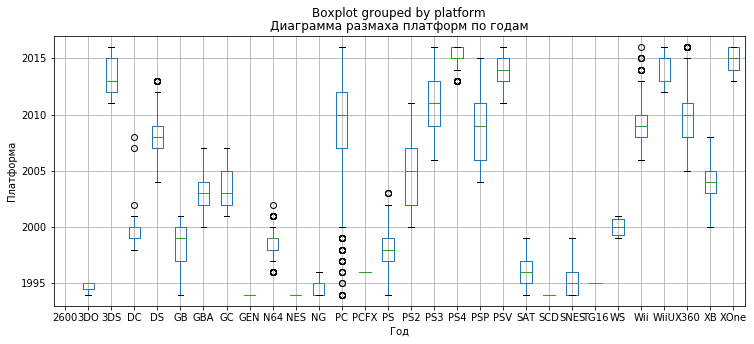

In [191]:
ax=good_years_data.boxplot(by='platform', column='year_of_release', figsize=[12,5])
ax.set_ylim(1993, 2017)
ax.set_title('Диаграмма размаха платформ по годам')
ax.set_xlabel('Год')
ax.set_ylabel('Платформа')
plt.show()

Из графика размаха видно, что до 2000 года срок жизни плтаформы очень короткий, а так же присутствует много выбросов

In [192]:
mean_platform_lifecycle = (good_years_data
                           .query('year_of_release>2000 and platform!="PC"')
                           .pivot_table(index='platform', columns='year_of_release',
                                        values='total_sales')
                          )
mean_platform_lifecycle = mean_platform_lifecycle.isnull()*1
mean_platform_lifecycle['len'] = mean_platform_lifecycle.sum(axis = 1)
mean_platform_lifecycle['len'].median()

10.0

Средний срок жизни платформы (после 2000 года) - 10 лет. В выборку не включена платформа PC т.к. она присутствует на всем протяжении исследований у может повлиять на результат.

In [193]:
relevant_data = good_years_data.query('year>2011').copy()

relevant_data_group = (relevant_data.groupby(['platform'])
    .agg({'total_sales': 'sum'}).sort_values(by='total_sales', ascending=False)
    )

relevant_big_5 = relevant_data_group.head()
relevant_data['platform_name'] = (
    relevant_data['platform']
    .where(relevant_data['platform'].isin(relevant_big_5.index), 'Другие')
)

relevant_big_5_group = relevant_data.pivot_table(index='year', columns='platform_name', values='total_sales', aggfunc='sum')

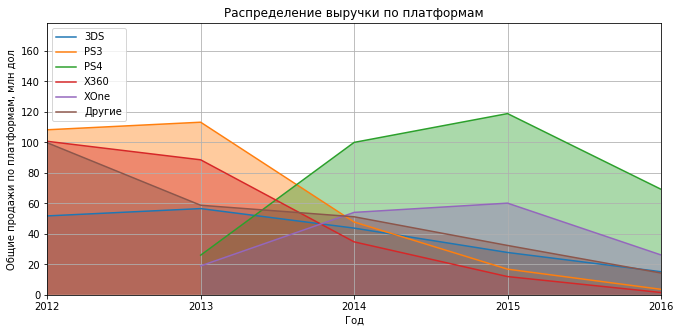

In [194]:
revenue_top_plot(relevant_big_5_group)

В актулаьных данных появились новые лидеры продаж. С 2014 года максимальные значения продаж показывают платформы PS4 и Xbox One. В 2013-2015 году наблюдается рост продаж у данных платформ, в 2016 году спад (данные за 2016 год не полные). Остальные платформы показывают снижение суммы продаж.

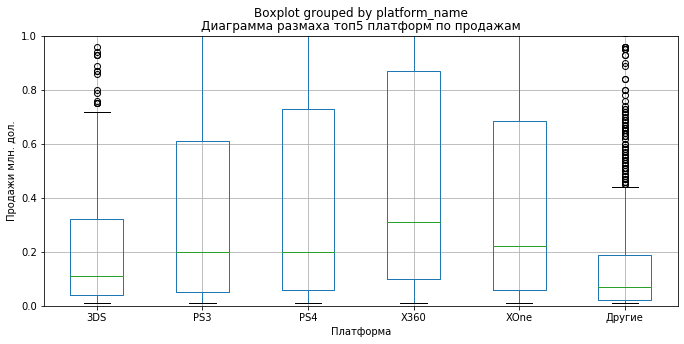

In [195]:
ax=relevant_data.boxplot(by='platform_name', column='total_sales', figsize=[11,5])
ax.set_ylim(0, relevant_data['total_sales'].mean()+0.5)
ax.set_title('Диаграмма размаха топ5 платформ по продажам')
ax.set_xlabel('Платформа')
ax.set_ylabel('Продажи млн. дол.')
plt.show()

In [196]:
relevant_data.groupby(['platform_name']).agg({'total_sales':'mean','name':'count'})

,total_sales,name
platform_name,,
3DS,0.491209,397
PS3,0.586457,494
PS4,0.801378,392
X360,0.807891,294
XOne,0.645020,247
Другие,0.238493,1075


При просмотре графиков размаха, так же наблюдаются определенные лидеры в продажах игр - платформы производителей Sony (PS3 и PS4) и Microsoft (Xbox360 и XboxOne). Медиана объема продаж выше у последних (в новом поколении незначительно, в предыдущем в 1.5 раза). Остальные платформы существенно уступают лидерам.

И среднего обьема продаж видно, что у Xbox360 значения на 25% выше , чем у PS3. Кол-во игр на XboX360 на 40% меньше, что означает высокие продажи для игр для платформы Microsoft по сравнению с играми для платформы Sony.

<div class="alert alert-warning">
<h2> Комментарий наставника</h2>
 
Подумай, из-за чего формируется разница между платформами. 

</div>

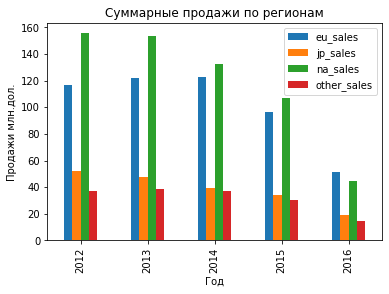

year,2012,2013,2014,2015,2016
eu_sales,116.47,122.03,122.74,96.72,51.22
jp_sales,51.80,47.93,39.69,34.09,19.31
na_sales,155.51,153.73,132.27,106.86,44.93
other_sales,36.74,38.42,36.83,30.31,14.48


In [197]:
columns= ['na_sales','eu_sales','jp_sales','other_sales']
ax=relevant_data.pivot_table( columns='year',values=columns, aggfunc='sum').T.plot(kind='bar')
ax.set_title('Суммарные продажи по регионам')
ax.set_ylabel('Продажи млн.дол.')
ax.set_xlabel('Год')
plt.show()
display(relevant_data.pivot_table( columns='year',values=columns, aggfunc='sum'))

США - крупнейший рынок, Европа - второе место, Япония - третье. Продажи в остальных регионнах в сумме сопоставимы с рынком Японии.

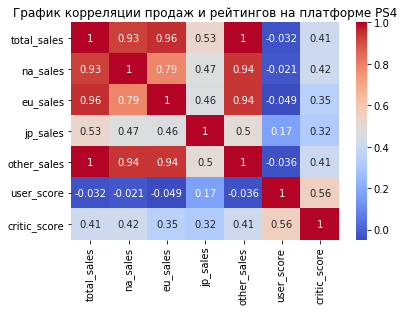

In [198]:
relevant_data_research = (relevant_data[['platform_name','total_sales','na_sales',
                                        'eu_sales','jp_sales','other_sales',
                                         'user_score','critic_score']])
ax=(sns.heatmap(relevant_data_research.query('platform_name=="PS4"')
               .corr(), annot = True, fmt='.2g', cmap= 'coolwarm')
   )
ax.set_title('График корреляции продаж и рейтингов на платформе PS4')
plt.show()

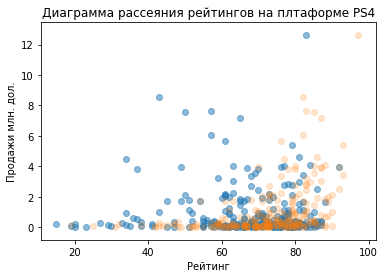

In [199]:
ax = plt.subplot()
relevant_data['user_score_to100'] = relevant_data['user_score']*10

(ax.scatter(y=relevant_data.query('platform_name=="PS4"')['total_sales'],
           x=relevant_data.query('platform_name=="PS4"')['user_score_to100'], alpha=0.5))
(ax.scatter(y=relevant_data.query('platform_name=="PS4"')['total_sales'],
           x=relevant_data.query('platform_name=="PS4"')['critic_score'], alpha=0.2))
ax.set_title('Диаграмма рассеяния рейтингов на плтаформе PS4')
ax.set_xlabel('Рейтинг')
ax.set_ylabel('Продажи млн. дол.')
plt.show()

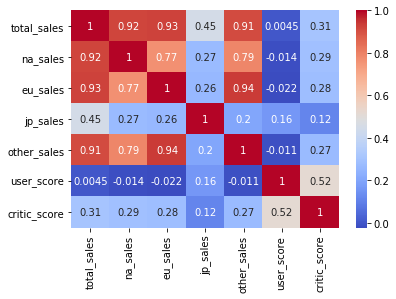

In [200]:
relevant_data_research = (relevant_data[['platform_name','total_sales','na_sales',
                                        'eu_sales','jp_sales','other_sales',
                                         'user_score','critic_score']]
                         )
sns.heatmap(relevant_data_research.corr(), annot = True, fmt='.2g', cmap= 'coolwarm')
ax.set_title('График корреляции продаж и рейтингов')
plt.show()

In [201]:
relevant_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2899 entries, 16 to 16714
Data columns (total 15 columns):
name                2899 non-null object
platform            2899 non-null object
year_of_release     2886 non-null float64
genre               2899 non-null object
na_sales            2899 non-null float64
eu_sales            2899 non-null float64
jp_sales            2899 non-null float64
other_sales         2899 non-null float64
critic_score        1322 non-null float64
user_score          1540 non-null float64
rating              1623 non-null object
year                2899 non-null int64
total_sales         2899 non-null float64
platform_name       2899 non-null object
user_score_to100    1540 non-null float64
dtypes: float64(9), int64(1), object(5)
memory usage: 362.4+ KB


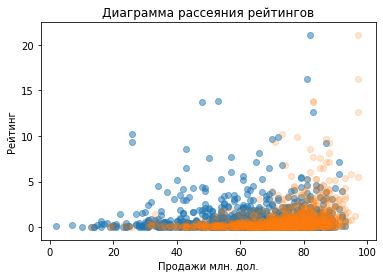

In [202]:
ax = plt.subplot()

ax.scatter(y=relevant_data['total_sales'], x=relevant_data['user_score_to100'], alpha=0.5)
ax.scatter(y=relevant_data['total_sales'], x=relevant_data['critic_score'], alpha=0.2)
ax.set_title('Диаграмма рассеяния рейтингов')
ax.set_ylabel('Рейтинг')
ax.set_xlabel('Продажи млн. дол.')
plt.show()

Для исследования взята самая прибыльная платформа акутальных лет - PS4.

Наблюдается слабая корреляция уровня продаж с отзывами критиков. Корреляция продаж с отзывами пользователей практически нулевая. Эти данные сопоставимы с данными для других платформ. Для PS4 наблюдается незначительное увеличение корреляции с отзывами критиков по сравнению с другими платформами.

Оценки критиков менее рассеяны, чем отзывы пользователей. Критики стараются придерживаться единого мнения, для игр с высоким рейтингом наблюдается так же и высокие продажи. Пользователи, в свою оцередь, менее избирательны и приобретают и оценивают более широкий спектр игр.

In [203]:
relevant_genre_group = (relevant_data.groupby(['genre'])
    .agg({'total_sales': 'sum'}).sort_values(by='total_sales', ascending=False)
    )
relevant_genre_group['percent'] = (relevant_genre_group['total_sales']/
                                   relevant_genre_group['total_sales'].sum()
                                  )
relevant_genre_group

,total_sales,percent
genre,,
Action,446.41,0.307428
Shooter,304.75,0.209871
Role-Playing,192.80,0.132775
Sports,181.07,0.124697
Misc,85.28,0.058730
Platform,61.00,0.042009
Racing,53.50,0.036844
Fighting,44.49,0.030639
Simulation,35.12,0.024186


Самые популярные жанры - Экшены и Шутеры (50% продаж суммарно). Эти направления выделяются на фоне остальных. Жанр экшена имеет доходность в 1.5 раза больше чем шутеры. Аутсайдерами являются стратегии и пазлы (менее 1% продаж).

## 3. Портрет пользователя каждого региона

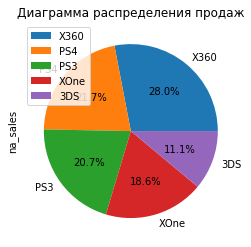

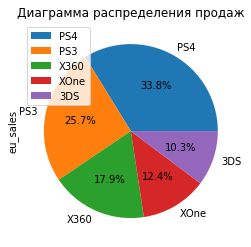

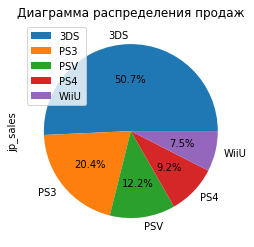

In [204]:
columns= ['na_sales','eu_sales','jp_sales']
def pie_for_sales(data_index):
    for element in columns:
        by_region = (relevant_data.pivot_table( index=data_index,values=element, aggfunc='sum')
                .sort_values(by=element, ascending=False)
                .head())


        by_region.plot(kind='pie',subplots=True, autopct='%1.1f%%' )
        plt.legend(loc="upper left")
        plt.title('Диаграмма распределения продаж')
        plt.show()
pie_for_sales('platform')

В Америке у платформ Sony и Microsoft примерно одинаковые пропорции продаж (у старого пололения чуть больше чем у нового). 3DS в аутсайдерах с десятой долей рынка.

В Европе лидирует платформа Sony - как в предыдущем поколении так и в текущем. Суммарно почти 60% рынка.

В Японии абсолютным лидером является платформа Nintendo 3DS - более 50%. Далее идут 3 платформы Sony с суммарными 40% и приставка WiiU. Японцы предпочитают отечественные консоли зарубежным.

Мобильный рынок Японскии более развит и существует дольше, чем большинство других рынков мира.

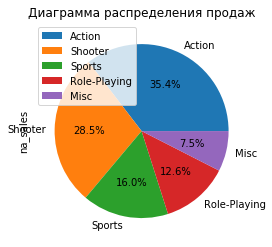

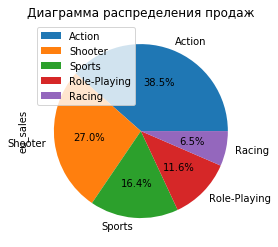

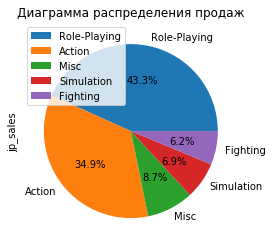

In [205]:
pie_for_sales('genre')

In [206]:
relevant_data.query('genre=="Shooter"').groupby(['rating']).agg({'name':'count'})

,name
rating,
E10+,16
M,160
T,27


Рынки США и Европы схожи (лидируют экшены, шутеры и спортивные симуляторы), рынок Японии имеет специфические отличия. На рынке Японии лидируют ролевые игры (существует даже отдельный жанр jRPG - японские РПГ игры), на втором месте Экшн игры с долей, примерно равной рынка Европы и Америки ~35%.

Японский рынок сформирован под влиянием фактора 'мобильности' - в шутеры не удобно играть на мобильных устройствах и большинство шутеров имеют рейтинг М (рынок Японии в основном составляют игры для аудитории менее 13 лет).

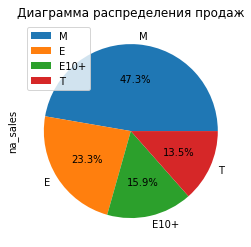

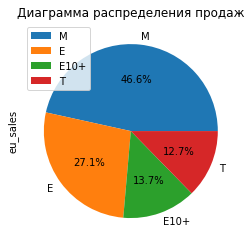

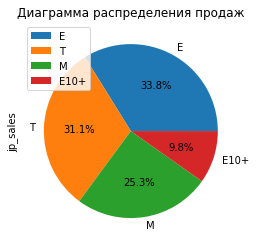

In [207]:
pie_for_sales('rating')

Рейтинг ESRB  (Возраст взят с оффициального сайта https://www.esrb.org/ratings-guide/):
E (Everyone) - 0+
E10+ (Everyone 10+) - 10+
T (Teen) - 13+
M (Mature) - 17+

Рынки Европы и Америки дублируют друг друга, категории расположены в одинаковом порядке, практически половину продаж составляют игры 17+, четверть игры уровня 0+.
Рынок Японии отличается - примерно равные значения (треть рынка) игры 13+ и 0+. Четверть рынка у игр 17+.

### Промежуточный вывод:

Типичный портрет геймера для Европы и Америки схож: играет на PS или XboX (тенденция идет к новому поколению), приемущественно в экшены или шутеры с ретингом 17+.
Типичный портрет геймера Японии: играет на платформе Sony или Nintendo, в основном в экшены или ролевые 0+ или 13+.
Из полученных данных можно сделать вывод что в Японии в игры играют в основном дети (если судить по рейтингу), в Европе и Америке более взрослое поколение.

## 4. Проверка гипотез

В рамках исследования необходимо проверить две гипотезы:
•	Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
•	Средние пользовательские рейтинги жанров Action и Sports разные.

Для проверки данных гипотез сформулируем двусторонние гипотезы. Двустороннюю гипотезу мы выбираем, т.к. мы не знаем в какую сторону (большую или меньшую) может измениться рейтинг.<br>
Нулевая гипотеза всегда формулируется так, чтобы использовать знак равенства. Исходя из нулевой гипотезы формулируется альтернативная гипотеза.

### Гипотеза 1

<b>Нулевая гипотеза:</b> средние пользовательские рейтинги платформ Xbox One и PC равны.<br>
<b>Альтернативаня гипотеза:</b> средние пользовательские рейтинги платформ Xbox One и PC не равны.

In [208]:
pc_user_score = relevant_data.query('platform=="PC"')['user_score'].dropna()
xboxone_user_score = relevant_data.query('platform=="XOne"')['user_score'].dropna()
results = st.ttest_ind(pc_user_score,xboxone_user_score)
alpha = 0.05

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение:  0.6252774522173157
Не получилось отвергнуть нулевую гипотезу


<b>Вывод:</b> Значение pvalue указывает на то, рейтинги отличаются, но вероятность того, что это произошло случайно, довольно высока (почти 62.5%). Такое же значение pvalue мы можем получить и при равенстве рейтингов платформ Xbox One и PC.

### Гипотеза 2

<b>Нулевая гипотеза:</b> средние пользовательские рейтинги жанров Action и Sports равны.<br>
<b>Альтернативаня гипотеза:</b> средние пользовательские рейтинги жанров Action и Sports не равны.

In [209]:
action_user_score = relevant_data.query('genre=="Action"')['user_score'].dropna()
sports_user_score = relevant_data.query('genre=="Sports"')['user_score'].dropna()
results = st.ttest_ind(action_user_score,sports_user_score)
alpha = 0.05

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение:  1.1405639632267916e-26
Отвергаем нулевую гипотезу


<b>Вывод:</b> Значение pvalue слишком мало, чтобы принять гипотезу о равенстве рейтингов.

## 5. Общий вывод

В рамках ислледования были рассотренные даные по продажам и рейтингам игр за 1980-2016 года.

Обзор данных показал, что продажи игр начали активно развиваться с 1993 года (у рядовых пользователей начали появляться персональные компьютеры и игровые приставки).
С 2004 года на рынке начали закрепляться лидеры отрасли - Sony, Microsoft и Nintendo. Лидерами рынка в актуальный для исследования пероид (с 2012 года) стали Sony и Microsoft, выпустив в 2013 году новые поколения своих крайне успешных консолей PlayStation и Xbox.

Крупнейшими рынками дестрибьюции игр являются Америка и Европа (в наблюдаемом периоде до максимальных 155 и 122 млн.дол. продаж в год соответственно).

Пользователи в США и Европе предпочитают одинаковые жанры игр (в большинстве экшены и шутеры), рынок Японии имеет специфические отличия (за счет аудитории пользователей).

Рейтинги пользователей и критиков имеют слабую зависитмость с продажами игр (0.3 для критиков и около 0 для пользователей). Это говорит о том, что пользователи редко прислушиваются к отзывам других пользователей, но иногда обращают внимание на рейтинг критиков.

Исходя из полученной информации можно сделать следующий прогноз на 2017 год: самые популярные и прибыльные игры - жанр Action и Shooter для платформ PS4 и XboXOne.